In [35]:
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
import chipcalibration.cross_resonance as _xr
from importlib import reload
import qubic.state_disc as sd
import chipcalibration.config as cfg
import qubic.job_manager_jpm as _jm
import chipcalibration.rabi_experiments as _rabi

In [36]:
reload(_xr)
reload(_rabi)
reload(_jm)

<module 'qubic.job_manager_jpm' from '/home/jpmarceaux/software/qubic/job_manager_jpm.py'>

In [37]:
qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)
chanmap = {'Q0':7,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':2}

In [38]:
runner = rc.CircuitRunnerClient(ip='192.168.1.247')
jobman = _jm.JobManager(fpga_config, channel_config, runner, qchip)

In [39]:
target_qid = 'Q2'
control_qid = 'Q3'

In [6]:
# GMM Rabi 
gmm_rabi = _rabi.GMMRabi([target_qid, control_qid], 0.2, np.linspace(1.e-9, 50.e-9, 10), 
                       channel_configs=channel_config)

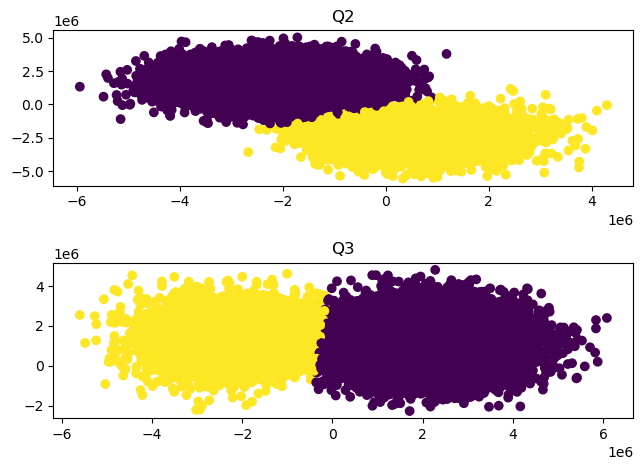

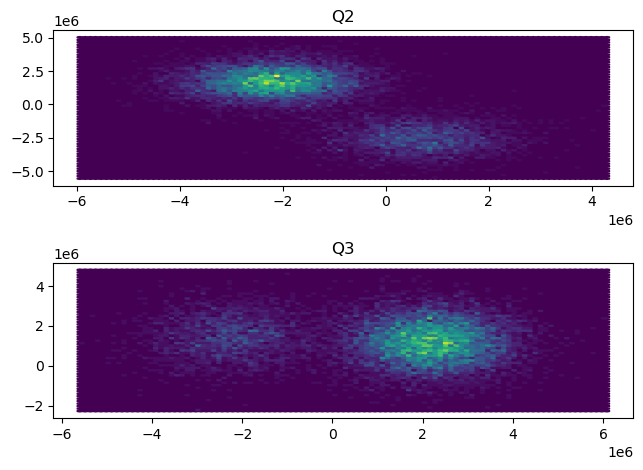

In [7]:
gmm_rabi.run_and_report(jobman, 1000, qchip)

In [55]:
jobman = _jm.JobManager(fpga_config, channel_config, runner, qchip,
                       gmm_manager=gmm_rabi.gmm_manager)

In [56]:
qchip.gates['Q3Q2CR'].cfg_dict

[{'fcarrier': 'Q2.freq',
  'pcarrier': 0.0,
  'dest': 'Q3.qdrv',
  'twidth': 4e-07,
  't0': 0.0,
  'amp': 0.1878849730612718,
  'env': [{'env_func': 'cos_edge_square',
    'paradict': {'ramp_fraction': 0.25, 'ramp_length': 3.2e-08}}]}]

In [42]:
reload(_xr)

<module 'chipcalibration.cross_resonance' from '/home/jpmarceaux/chipcalibration/chipcalibration/cross_resonance.py'>

In [33]:
pulse_width_interval = np.linspace(350.e-9, 400.e-9, 4)
drive_amp_interval = np.linspace(0.1, 0.2, 10)

In [34]:
ixr = _xr.CrossResonanceCalibration(control_qid, target_qid, 
                                    pulse_width_interval, drive_amp_interval)

In [35]:
%matplotlib inline

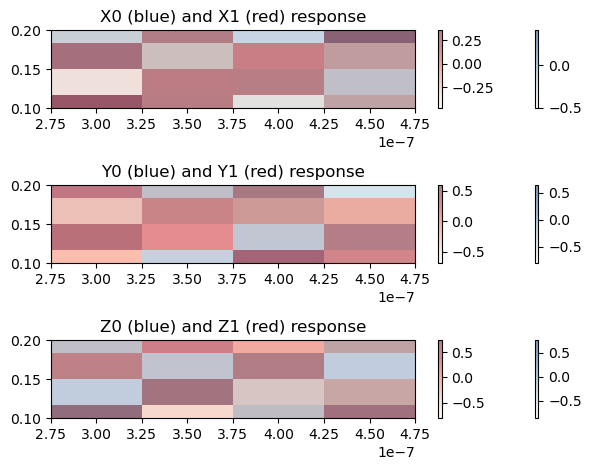

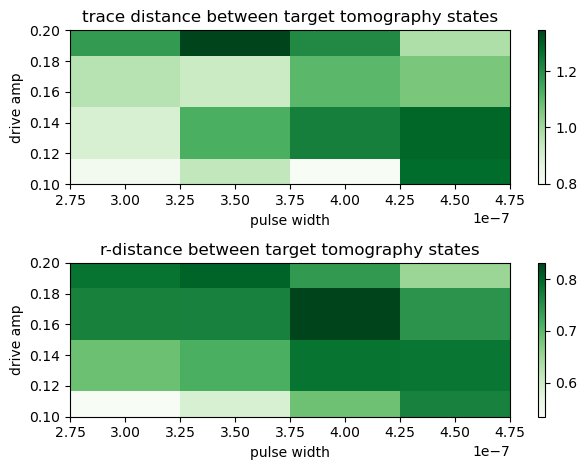

1

In [36]:
ixr.run_and_report(jobman, 1000, qchip)

# do a second sweep at a higher resolution

In [37]:
pulse_width_interval = np.linspace(300.e-9, 400.e-9, 5)
drive_amp_interval = np.linspace(0.16, 0.18, 10)

In [38]:
ixr = _xr.CrossResonanceCalibration(control_qid, target_qid, 
                                    pulse_width_interval, drive_amp_interval)

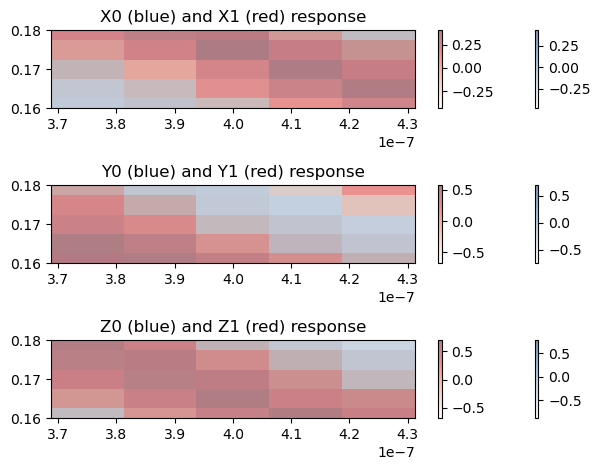

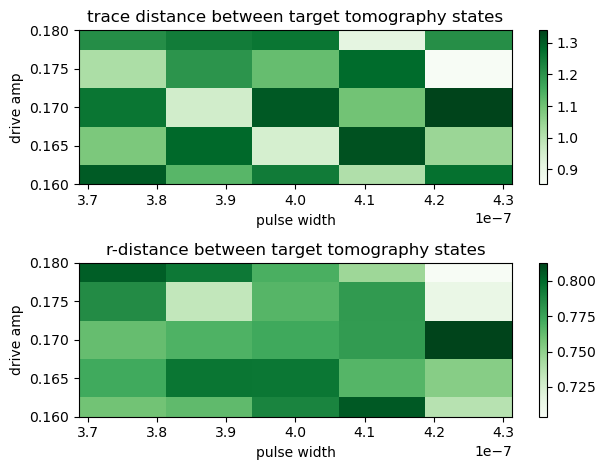

1

In [39]:
ixr.run_and_report(jobman, 1000, qchip)

I'll use a pulse width of 185ns and a drive amp range of [0.45, 0.5]

# now, just sweep amp at a fixed twidth

In [46]:
pulse_width_interval = [350e-9]
drive_amp_interval = np.linspace(0.1, 0.5, 30)

In [47]:
ixr = _xr.CrossResonanceCalibration(control_qid, target_qid, 
                                    pulse_width_interval, drive_amp_interval)

1

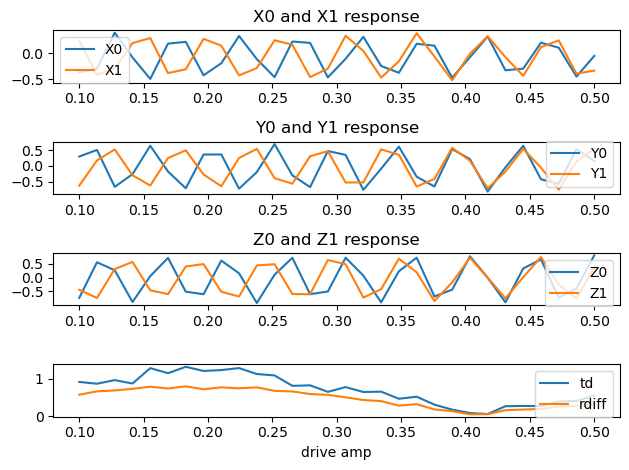

In [48]:
ixr.run_and_report(jobman, 1000, qchip)

## Now sweep the time at a fixed drive amp

In [72]:
pulse_width_interval = np.linspace(100e-9, 400e-9, 30)
drive_amp_interval = [0.4]

In [73]:
ixr = _xr.CrossResonanceCalibration(control_qid, target_qid, 
                                    pulse_width_interval, drive_amp_interval)

1

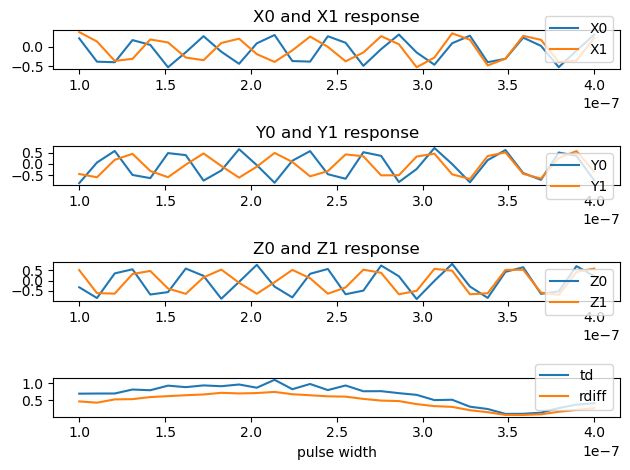

In [74]:
ixr.run_and_report(jobman, 1000, qchip)

I'll use a pulse width of 185ns and a drive amp range of [0.45, 0.5]